In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv('/kaggle/input/airbnb-bangkok-analysis/listings (1).csv')

# Xem tổng quan dữ liệu
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27548 entries, 0 to 27547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27548 non-null  int64  
 1   name                            27548 non-null  object 
 2   host_id                         27548 non-null  int64  
 3   host_name                       27545 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   27548 non-null  object 
 6   latitude                        27548 non-null  float64
 7   longitude                       27548 non-null  float64
 8   room_type                       27548 non-null  object 
 9   price                           22158 non-null  float64
 10  minimum_nights                  27548 non-null  int64  
 11  number_of_reviews               27548 non-null  int64  
 12  last_review                     

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.754800e+04,2.754800e+04,0.0,27548.000000,27548.000000,22158.000000,27548.000000,27548.000000,18082.000000,27548.000000,27548.000000,27548.000000,0.0
mean,7.214992e+17,2.722073e+08,NaN,13.745052,100.562716,2669.983979,14.634565,19.690540,1.084755,28.359010,235.157725,6.295194,NaN
std,5.475592e+17,2.200003e+08,NaN,0.040305,0.049357,17490.423444,43.833985,51.709977,1.538972,47.173066,131.620040,16.695770,NaN
min,2.793400e+04,2.144700e+04,NaN,13.527300,100.328924,39.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.790005e+07,6.225677e+07,NaN,13.720766,100.531990,976.000000,1.000000,0.000000,0.230000,2.000000,129.000000,0.000000,NaN
50%,9.280608e+17,2.199848e+08,NaN,13.739670,100.565597,1454.000000,2.000000,3.000000,0.610000,8.000000,270.000000,1.000000,NaN
75%,1.218927e+18,4.977950e+08,NaN,13.758530,100.585360,2328.000000,20.000000,17.000000,1.430000,32.000000,361.000000,6.000000,NaN
max,1.379758e+18,6.847466e+08,NaN,13.953540,100.923710,1000000.000000,1115.000000,2572.000000,53.230000,216.000000,365.000000,1035.000000,NaN


**Làm sạch dữ liệu**

In [4]:
# Bỏ các cột không hữu ích
df = df.drop(columns=['neighbourhood_group', 'license'])

# Bỏ dòng thiếu giá tiền (vì không phân tích được)
df = df.dropna(subset=['price'])

# Nếu muốn đơn giản, có thể bỏ thêm các dòng không có review
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

Phân phối giá thuê

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


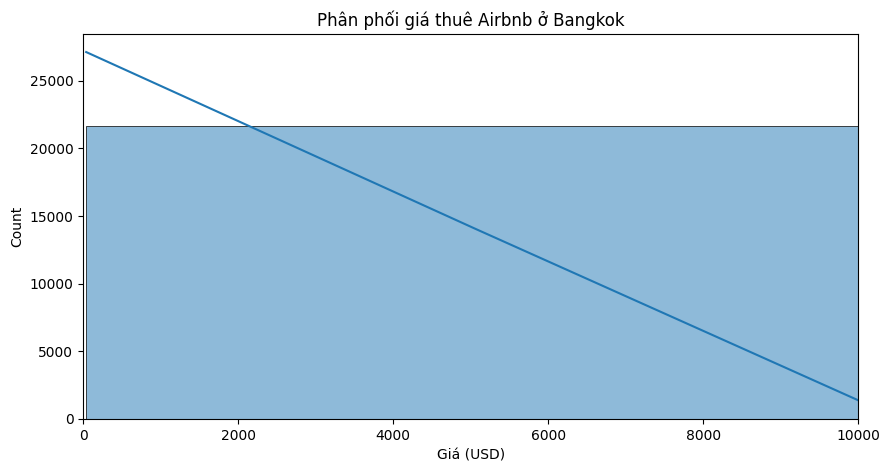

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 10000)  # Giới hạn để loại bỏ outliers
plt.title("Phân phối giá thuê Airbnb ở Bangkok")
plt.xlabel("Giá (USD)")
plt.show()

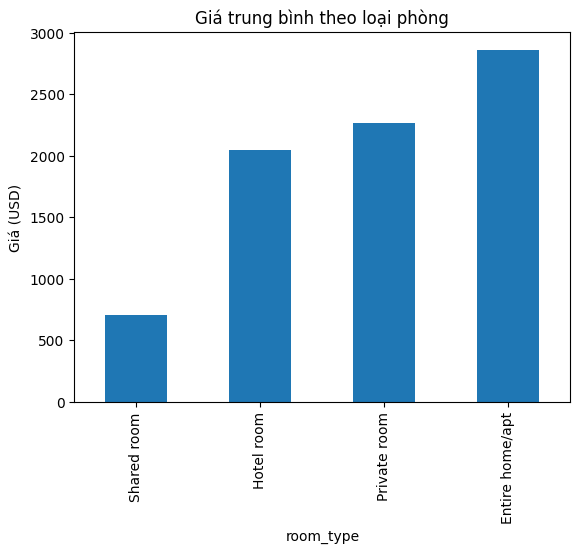

In [6]:
room_avg_price = df.groupby("room_type")['price'].mean().sort_values()

room_avg_price.plot(kind='bar', title="Giá trung bình theo loại phòng")
plt.ylabel("Giá (USD)")
plt.show()

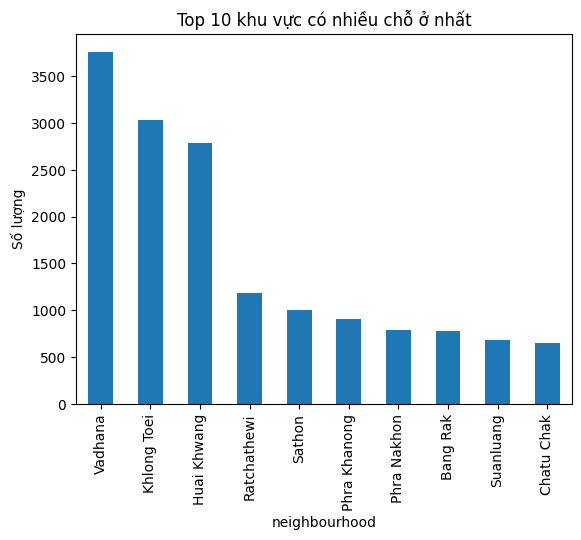

In [7]:
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)

top_neighbourhoods.plot(kind='bar', title="Top 10 khu vực có nhiều chỗ ở nhất")
plt.ylabel("Số lượng")
plt.show()

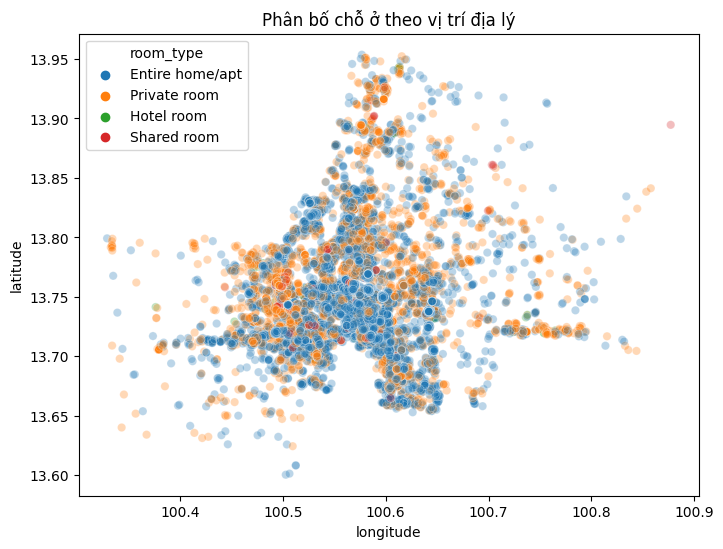

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='room_type', alpha=0.3)
plt.title("Phân bố chỗ ở theo vị trí địa lý")
plt.show()

In [9]:
import pandas as pd

calendar = pd.read_csv("/kaggle/input/airbnb-bangkok-analysis/calendar.csv")
calendar.head()
calendar.info()

/tmp/ipykernel_35/3714913660.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar = pd.read_csv("/kaggle/input/airbnb-bangkok-analysis/calendar.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054707 entries, 0 to 10054706
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 537.0+ MB


In [10]:
# Chuyển đổi cột ngày và giá
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['available'] = calendar['available'].map({'t': True, 'f': False})

<Axes: title={'center': 'Giá trung bình theo ngày'}, xlabel='date'>

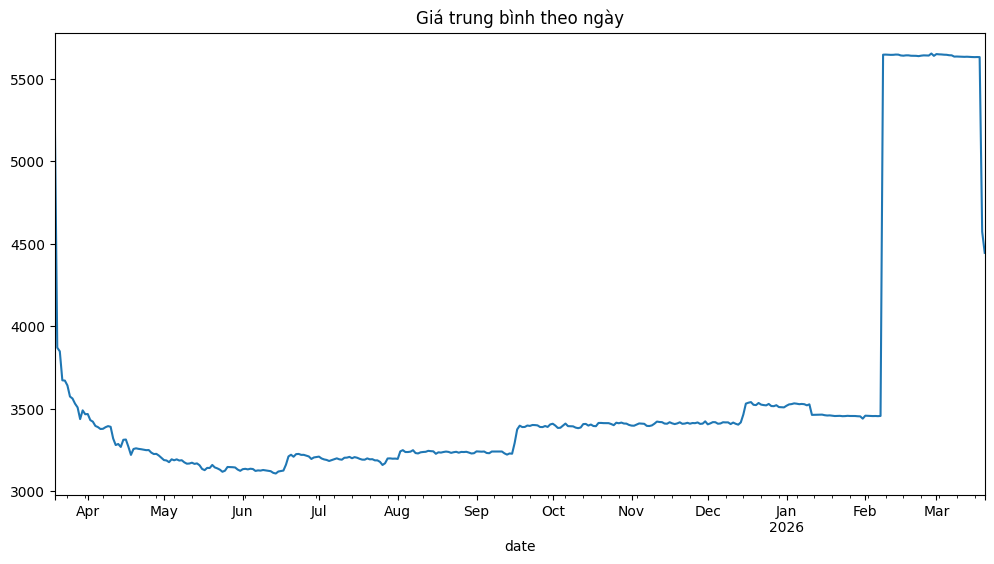

In [11]:
price_by_date = calendar[calendar['available'] == True].groupby('date')['price'].mean()

price_by_date.plot(figsize=(12,6), title="Giá trung bình theo ngày")

<Axes: title={'center': 'Tỷ lệ sẵn có theo ngày'}, xlabel='date'>

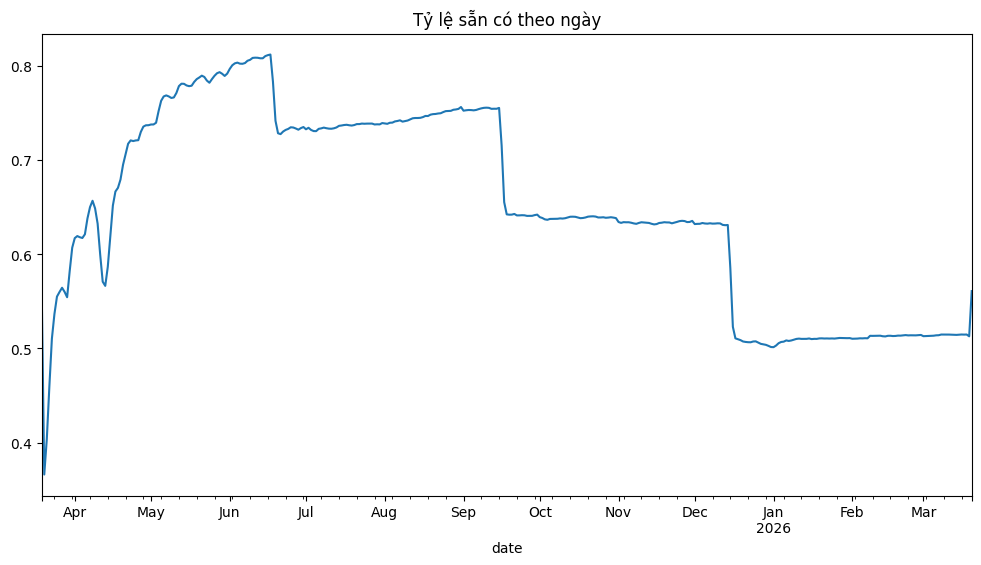

In [12]:
availability_by_date = calendar.groupby('date')['available'].mean()

availability_by_date.plot(figsize=(12,6), title="Tỷ lệ sẵn có theo ngày")

<Axes: title={'center': 'Giá trung bình theo ngày trong tuần'}, xlabel='day_of_week'>

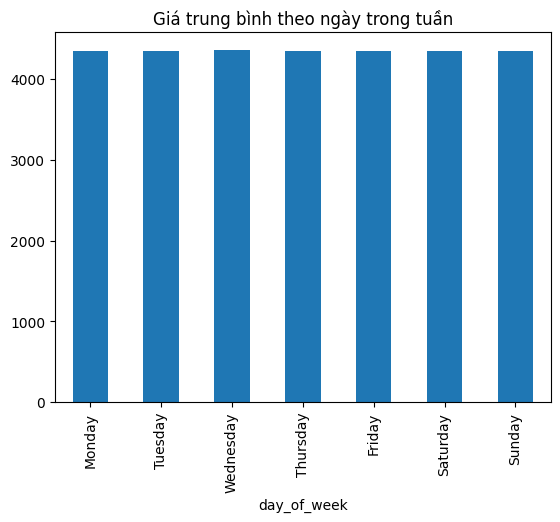

In [13]:
calendar['day_of_week'] = calendar['date'].dt.day_name()
price_by_dow = calendar.groupby('day_of_week')['price'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

price_by_dow.plot(kind='bar', title="Giá trung bình theo ngày trong tuần")

In [14]:
reviews = pd.read_csv("/kaggle/input/airbnb-bangkok-analysis/reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,27934,1094339,2012-04-07,1368195,Michael,We stayed in the apartment for a week and we e...
1,27934,1241042,2012-05-07,2007324,Scott,My girlfriend and I recently stayed in Nuttee'...
2,27934,1523384,2012-06-20,2263352,Marc,I stayed for one month at the condo and was re...
3,27934,1655571,2012-07-08,558987,Leyla,Nuttee was a great host! I really enjoyed her ...
4,27934,1972192,2012-08-13,2359865,Rachel,Nuttee was an amazing host. She and her daught...


<Axes: title={'center': 'Số review theo thời gian'}, xlabel='date'>

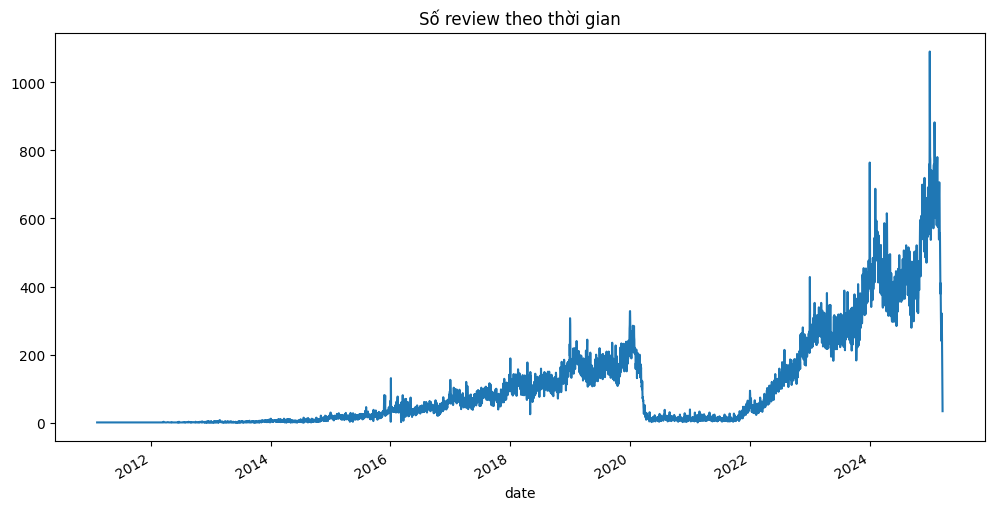

In [15]:
reviews['date'] = pd.to_datetime(reviews['date'])
review_count = reviews.groupby('date').size()

review_count.plot(figsize=(12,6), title="Số review theo thời gian")

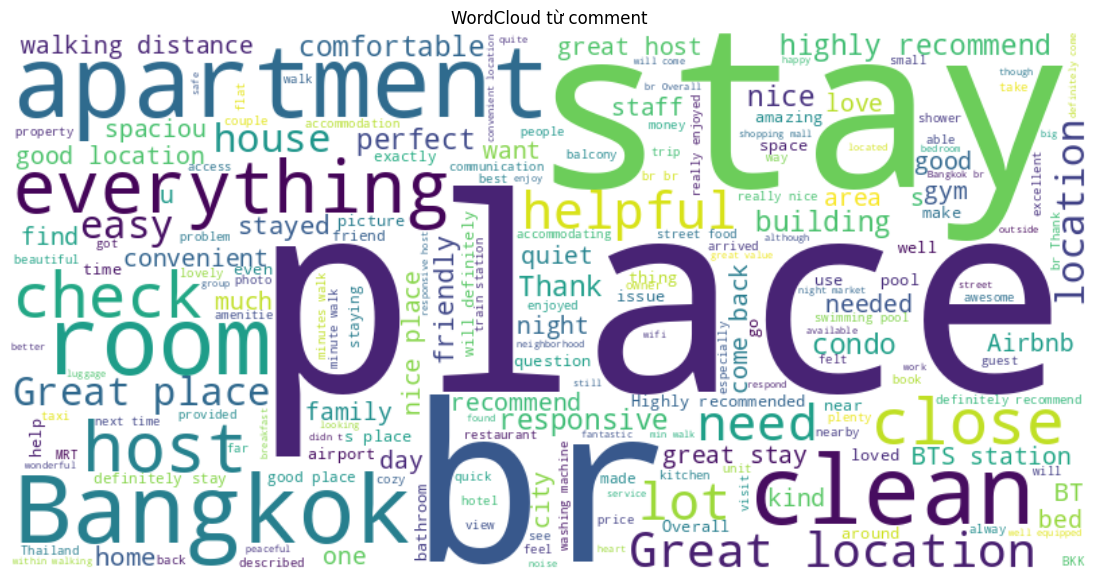

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(str(comment) for comment in reviews['comments'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud từ comment")
plt.show()